# Код

### Импорт библиотек

In [1]:
import scipy.special as spl
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Определение класса нейронной сети

In [2]:
class neuralNetwork:

### инициализировать нейронную сеть ###
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        # Матрицы весовых коэффициентов связей wih и who.
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя обозначены как w__i__j: wll w21 wl2 w22 и т.д.
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        # коэффициент обучения
        self.lr = learningrate
        # использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: spl.expit(x)

### тренировка нейронной сети ###
    def train(self, inputs_list, targets_list):
        # преобразовать список входных значений в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        # рассчитать входящие сигналы для выходного 
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        # ошибка = целевое значение - фактическое значение
        output_errors = targets - final_outputs
        # ошибки скрытого слоя - это ошибки output_errors, распределенные пропорционально весовым коэффициентам связей и рекомбинированные на скрытых узлах
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.lr * np.dot((output_errors * final_outputs * (1. - final_outputs)), np.transpose(hidden_outputs))
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1. - hidden_outputs)), np.transpose(inputs))

### опрос нейронной сети ###
    def query(self, inputs_list):
        # преобразовать список входных значений # в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

### Создание экземпляра нейронной сети

In [3]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 300
output_nodes = 10
# коэффициент обучения равен 0.1
learning_rate = 0.1
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

### Импорт датасетов для тренировки и тестирования нейронной сети

In [4]:
# загрузить в список тренировочный набор данных CSV-файлов набора MNIST
with open('mnist_dataset/mnist_train.csv', 'r') as f:
    training_data_list = f.readlines()
# загрузить в список тестовый набор данных CSV-файлов набора MNIST
with open('mnist_dataset/mnist_test.csv', 'r') as f:
    test_data_list = f.readlines()

### Обучение нейронной сети

In [5]:
%%time
# переменная epochs указывает, сколько раз тренировочный # набор данных используется для тренировки сети
epochs = 10
for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений, используя символы запятой в качестве разделителей
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (np.asfarray(all_values[1:]) / 255. * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0.01, за исключением желаемого маркерного значения, равного 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

CPU times: user 25min, sys: 4min 16s, total: 29min 17s
Wall time: 4min 4s


### Тестирование нейронной сети

In [6]:
# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for i, record in enumerate(test_data_list):
    print(f'Тест №{i + 1}:')
    # получить список значений из записи, используя символы запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (np.asfarray(all_values[1:]) / 255. * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = np.argmax(outputs)
    print(f'Ответ нейросети: {label}')
    print(f'Правильный ответ: {correct_label}')
    # присоединить оценку ответа сети к концу списка
    if label == correct_label:
        # в случае правильного ответа сети присоединить к списку “галочку“
        scorecard.append('✅')
        print('Результат: ✅', '\n')
    else:
        # в случае неправильного ответа сети присоединить к списку “крестик“
        scorecard.append('❌')
        print('Результат: ❌', '\n')

correct_answers = 0
for i, result in enumerate(scorecard):
    print(f' {i + 1}: {result};', end='')
    if result == '✅':
        correct_answers += 1
print('\n\n\n\n', f'Эффективность = {correct_answers / len(scorecard) * 100}%')

Тест №1:
Ответ нейросети: 7
Правильный ответ: 7
Результат: ✅ 

Тест №2:
Ответ нейросети: 2
Правильный ответ: 2
Результат: ✅ 

Тест №3:
Ответ нейросети: 1
Правильный ответ: 1
Результат: ✅ 

Тест №4:
Ответ нейросети: 0
Правильный ответ: 0
Результат: ✅ 

Тест №5:
Ответ нейросети: 4
Правильный ответ: 4
Результат: ✅ 

Тест №6:
Ответ нейросети: 1
Правильный ответ: 1
Результат: ✅ 

Тест №7:
Ответ нейросети: 4
Правильный ответ: 4
Результат: ✅ 

Тест №8:
Ответ нейросети: 9
Правильный ответ: 9
Результат: ✅ 

Тест №9:
Ответ нейросети: 5
Правильный ответ: 5
Результат: ✅ 

Тест №10:
Ответ нейросети: 9
Правильный ответ: 9
Результат: ✅ 

Тест №11:
Ответ нейросети: 0
Правильный ответ: 0
Результат: ✅ 

Тест №12:
Ответ нейросети: 6
Правильный ответ: 6
Результат: ✅ 

Тест №13:
Ответ нейросети: 9
Правильный ответ: 9
Результат: ✅ 

Тест №14:
Ответ нейросети: 0
Правильный ответ: 0
Результат: ✅ 

Тест №15:
Ответ нейросети: 1
Правильный ответ: 1
Результат: ✅ 

Тест №16:
Ответ нейросети: 5
Правильный ответ: 5


# Приложение

### Статистика затраченного времени на тренировки и эффективности нейронной сети с разными характеристиками

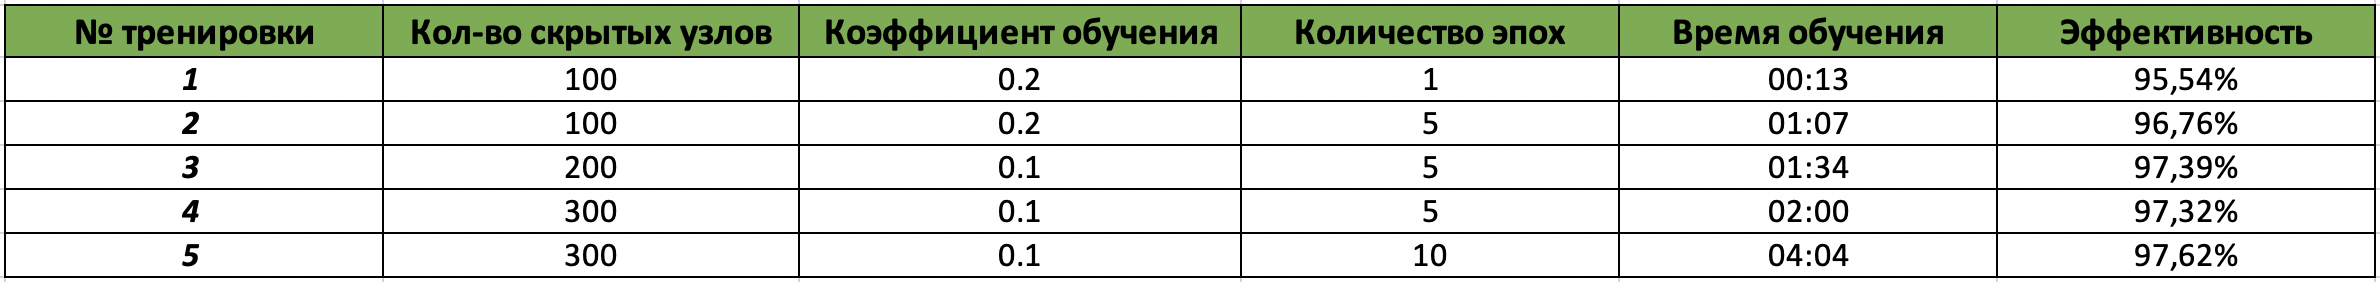

### Визуализация тестирующего датасета

In [7]:
all_values = test_data_list[7945].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation = None)
# Привести входные значения к диапазорну 0.01 - 1.00
scaled_input = (np.asfarray(all_values[1:]) / 255. * 0.99) + 0.01
# # количество выходных узлов - 10 (пример)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(f'Targets: {targets}', f'Correct answer: {all_values[0]}.')

Targets: [0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01] Correct answer: 2.
